In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

y = [2,4,6,8,10,12,14,16,18,20]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
plt.title('Legend inside')
ax.legend()
# plt.show()

fig.savefig('plot.png')

<Figure size 432x288 with 0 Axes>

In [1]:
from dlisio import dlis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [2]:
filename = r'C:\Jimmy\Codeholic\ongc-wire\science\DLIS\NLOG_LIS_LAS_7857_FMS_DSI_MAIN_LOG.DLIS'
f, *tail = dlis.load(filename)
print(f)

LogicalFile(FMS_DSI_138PUP)


In [3]:
f.frames

[Frame(60B), Frame(10B), Frame(1B), Frame(15B)]

In [4]:
list_frame = f.frames
x = str(list_frame[2]).split('(', )
x[0]

'Frame'

In [5]:
y = x[1].split(')')[0]
y

'1B'

In [6]:
frame1 = f.object('FRAME','60B')

In [7]:
dtc = f.object('CHANNEL', 'DTCO')

# Print out the properties of the channel/curve
print(f'Name: \t\t{dtc.name}')
print(f'Long Name: \t{dtc.long_name}')
print(f'Units: \t\t{dtc.units}')
print(f'Dimension: \t{dtc.dimension}') #if >1, then data is an array

Name: 		DTCO
Long Name: 	Delta-T Compressional
Units: 		us/ft
Dimension: 	[1]


In [8]:
curves = frame1.curves()
d = curves.dtype
d.names

('FRAMENO',
 'TDEP',
 'BS',
 'CS',
 'TENS',
 'ETIM',
 'DEVI',
 'P1AZ_MEST',
 'ANOR',
 'FINC',
 'HAZI',
 'P1AZ',
 'RB',
 'SDEV',
 'GAT',
 'GMT',
 'ECGR',
 'ITT',
 'SPHI',
 'DCI2',
 'DCI4',
 'SOBS',
 'DTCO',
 'DTSM',
 'PR',
 'VPVS',
 'CHR2',
 'DT2R',
 'DTRP',
 'CHRP',
 'DTRS',
 'CHRS',
 'DTTP',
 'CHTP',
 'DTTS',
 'CHTS',
 'DT2',
 'DT4P',
 'DT4S',
 'SPCF',
 'DPTR',
 'DPAZ',
 'QUAF',
 'DDIP',
 'DDA',
 'FCD',
 'HDAR',
 'RGR',
 'TIME',
 'CVEL',
 'MSW1',
 'MSW2',
 'FNOR',
 'SAS2',
 'SAS4',
 'PWF2',
 'PWN2',
 'PWF4',
 'PWN4',
 'SVEL',
 'SSVE',
 'SPR2',
 'SPR4',
 'SPT4',
 'DF',
 'CDF',
 'CLOS',
 'ED',
 'ND',
 'TVDE',
 'VSEC',
 'CWEL',
 'AREA',
 'AFCD',
 'ABS',
 'IHV',
 'ICV',
 'GR')

In [9]:
curves = frame1.curves()

depth = curves['TDEP'] * 0.00254
dtco = curves['DTCO']
dtsm = curves['DTSM']
stc_mono = curves['SPR4']
wf_mono = curves['PWF4']

print(f'{depth.min()} - {depth.max()}')

4574.4384765625 - 4819.04052734375


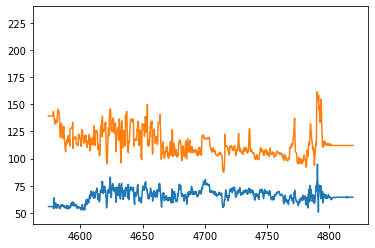

In [10]:
plt.plot(depth, dtco)
plt.plot(depth, dtsm)
plt.ylim(40, 240)
plt.show()

In [11]:
drho = curves['DRHO']
plt.plot(drho)

ValueError: no field of name DRHO

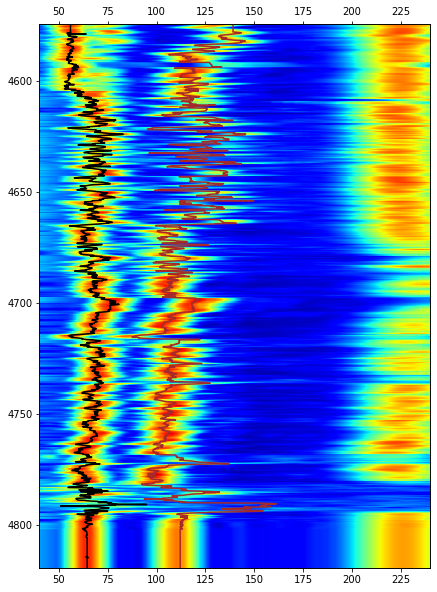

In [ ]:
fig, axes = plt.subplots(figsize=(7,10))

ax1 = plt.subplot2grid((1, 1), (0,0))
ax2 = ax1.twiny()

ax1.imshow(stc_mono, interpolation='bilinear', aspect='auto',
          cmap=plt.cm.jet, vmin=0, vmax=100,
           extent=[40, 240, depth.min(), depth.max()])

#Setting up the display depth range. Note that the
# depths need to be deepest first and shallowest second
ax1.set_ylim(depth.max(), depth.min())

ax2.plot(dtco, depth, color='black')
ax2.plot(dtsm, depth, color='brown')

ax2.set_xlim(40, 240)

plt.show()


In [ ]:
wf_r1 = wf_mono[:, 0, :]
print(wf_r1.min())
print(wf_r1.max())

-8192
8188


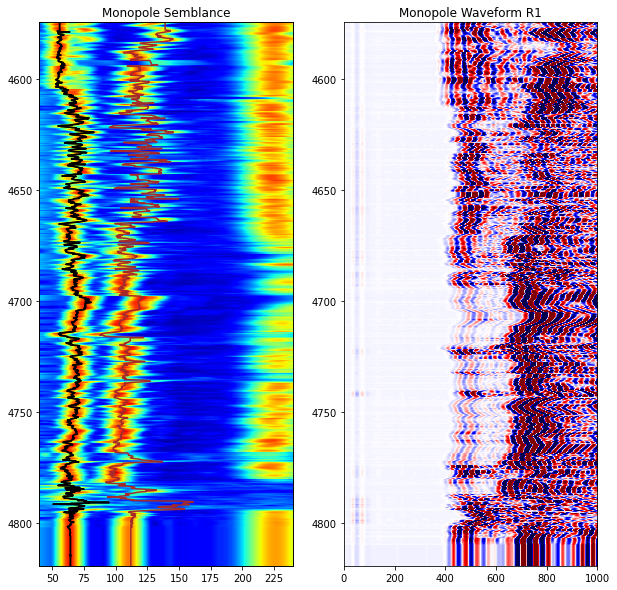

In [ ]:
fig = plt.subplots(figsize=(10,10))

# Subplot for the semblance map
ax1 = plt.subplot2grid((1, 2), (0,0))

# Subplot for the DTC and DTS curves
ax2 = ax1.twiny()

# Subplot for the waveform data
ax3 = plt.subplot2grid((1, 2), (0,1))

ax1.imshow(stc_mono, interpolation='bilinear', aspect='auto',
          cmap=plt.cm.jet, vmin=0, vmax=100,
           extent=[40, 240, depth.min(), depth.max()])

ax1.set_title('Monopole Semblance')

ax2.plot(dtco, depth, color='black')
ax2.set_xlim(40, 240)
ax2.set_xticks([])

ax2.plot(dtco, depth, color='black')
ax2.plot(dtsm, depth, color='brown')

ax3.set_title('Monopole Waveform R1')
ax3.imshow(wf_r1, interpolation='bilinear', aspect='auto',
          cmap=plt.cm.seismic, vmin=-2000, vmax=2000,
           extent=[0, 3000, depth.min(), depth.max()])

ax3.set_xlim(0, 1000)


for ax in [ax1, ax2, ax3]:
    ax.set_ylim(depth.max(), depth.min())

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Add the widgets decorator and setup the interactive variables
@widgets.interact(MinDepth=(depth.min(),depth.max(), 10), 
                  MaxDepth=(depth.min(),depth.max(), 10),
                 MinDT=(40, 240, 5),
                 MaxDT=(40, 240, 5))
def acoustic_plot(MinDepth=depth.min(), MaxDepth=depth.max(),
                 MinDT=40, MaxDT=240):
    fig = plt.subplots(figsize=(10,10))

    # Subplot for the semblance map
    ax1 = plt.subplot2grid((1, 2), (0,0))

    # Subplot for the DTC and DTS curves
    ax2 = ax1.twiny()

    # Subplot for the waveform data
    ax3 = plt.subplot2grid((1, 2), (0,1))

    ax1.imshow(stc_mono, interpolation='bilinear', aspect='auto',
              cmap=plt.cm.jet, vmin=0, vmax=100,
               extent=[40, 240, depth.min(), depth.max()])
    ax1.set_xlim(MinDT, MaxDT)
    ax1.set_title('Monopole Semblance')

    ax2.plot(dtco, depth, color='black')
    ax2.set_xlim(MinDT, MaxDT)
    ax2.set_xticks([])

    ax2.plot(dtco, depth, color='black')
    ax2.plot(dtsm, depth, color='brown')

    ax3.set_title('Monopole Waveform R1')
    ax3.imshow(wf_r1, interpolation='bilinear', aspect='auto',
              cmap=plt.cm.seismic, vmin=-2000, vmax=2000,
               extent=[0, 3000, depth.min(), depth.max()])

    ax3.set_xlim(0, 1000)


    for ax in [ax1, ax2, ax3]:
        ax.set_ylim(MaxDepth, MinDepth)

interactive(children=(FloatSlider(value=4574.4384765625, description='MinDepth', max=4819.04052734375, min=457…